<a href="https://colab.research.google.com/github/Ihechineme/Ihechineme/blob/main/Building%20a%20Machine%20Learning%20Model%20for%20a%20Business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECH4DEV: MONTH 4 PROJECT**

BY

# **ANNE EZEH**

**Introduction**

The aim of this month's project is to help a small business owner whose business has incurred loss as a result of his products been returned to the warehouse after delivery.

**Objective**

To build a machine learning model that will predict if goods will be returned based on the data on record.

**Mode of Work**

The project followed the common data pipeline. It was divided into six headings:


1.   Data Cleaning: The data was inspected for missing values and duplicates.  
2.   Data Exploration: Understanding the data better by performing exploratory data analysis. Valuable insights that will prove useful to the business owner in the near future were obtained.
3. Data Preprocessing: Because the data contained a lot of categorical data, it had to be encoded to make it easy to train the machine learning model.
4. Model Selection: From the objective of this project, it was identified that this was a classification problem. As there are different classification models, the one which would give the best accuracy was selected. More on this below.
5. Model Building: Finally, the selected model was bulit and tested.
6. Model Evaluation: Evaluating how accurate the model is in predicting the values using a suitable evaluation metric. The chosen metric is Accuracy.



In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/amazon seller.csv')
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹1,347.00",₹84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹1,299.00",₹105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹1,499.00",₹80.24,Cash On Delivery,Delivered to buyer


# **Data Cleaning**
Removing missing values and changing to the correct datatype.

In [3]:
df['item_total'] = df['item_total'].astype(str).str.replace('₹', '')
df['item_total'] = df['item_total'].str.replace(',', '')
df['item_total']

0       449.00
1       449.00
2       449.00
3          nan
4      1099.00
        ...   
166    1347.00
167    1299.00
168    1299.00
169    1499.00
170     449.00
Name: item_total, Length: 171, dtype: object

The currency symbol and comma was removed so the column can be converted to the appropraiate datatype.

In [4]:
df['item_total'] = df['item_total'].astype(float)

#imputing the missing values with the mean of the series
mean_value = df['item_total'].mean()
df['item_total'].fillna(mean_value, inplace=True)

In [5]:
df['item_total']

0       449.000000
1       449.000000
2       449.000000
3       582.856209
4      1099.000000
          ...     
166    1347.000000
167    1299.000000
168    1299.000000
169    1499.000000
170     449.000000
Name: item_total, Length: 171, dtype: float64

In [6]:
#converting to appropriate data type
df['shipping_fee'] = df['shipping_fee'].astype(str).str.replace('₹', '')
df['shipping_fee'] = df['shipping_fee'].astype(float)

#filling in missing values
median_value = df['shipping_fee'].median()
df['shipping_fee'].fillna(median_value, inplace=True)

In [7]:
#PBD is Paid Before Delivery

df['cod'].fillna('PBD', inplace=True)
df['cod']

0                   PBD
1                   PBD
2                   PBD
3      Cash On Delivery
4                   PBD
             ...       
166    Cash On Delivery
167                 PBD
168                 PBD
169    Cash On Delivery
170                 PBD
Name: cod, Length: 171, dtype: object

In [8]:
#checking to make sure that all the missing values are removed
df.isnull().sum()

order_no        0
order_date      0
buyer           0
ship_city       0
ship_state      0
sku             0
description     0
quantity        0
item_total      0
shipping_fee    0
cod             0
order_status    0
dtype: int64

# **Data Exploration**

In [9]:
df.head(10)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.000000,84.96,PBD,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.000000,60.18,PBD,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.000000,60.18,PBD,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,582.856209,84.96,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.000000,84.96,PBD,Delivered to buyer
5,406-9292208-6725123,"Thu, 17 Jun, 2021, 9:12 pm IST",Subinita,"HOWRAH,",WEST BENGAL,SKU: HH-FOWV-5YWO,Women's Trendy Pure Leather Clutch Purse | Lea...,1,200.000000,84.96,PBD,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,582.856209,84.96,Cash On Delivery,Returned to seller
7,405-8702211-4054722,"Wed, 29 Sept, 2021, 2:55 pm IST",Pratima,"BAREILLY,",UTTAR PRADESH,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,399.000000,84.96,Cash On Delivery,Delivered to buyer
8,171-1434812-8061163,"Sat, 13 Nov, 2021, 7:37 pm IST",Ipshita,"BENGALURU,",KARNATAKA,SKU: 3F-4R9N-Z8NJ,Set of 2 Pure Leather Block Print Round Jewelr...,1,399.000000,84.96,PBD,Delivered to buyer
9,171-7954707-4463549,"Mon, 9 Aug, 2021, 4:47 pm IST",A.Jayaprada,"Bhilai,",CHHATTISGARH,SKU: NU-CKZ5-4O49,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.000000,84.96,PBD,Delivered to buyer


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_no      171 non-null    object 
 1   order_date    171 non-null    object 
 2   buyer         171 non-null    object 
 3   ship_city     171 non-null    object 
 4   ship_state    171 non-null    object 
 5   sku           171 non-null    object 
 6   description   171 non-null    object 
 7   quantity      171 non-null    int64  
 8   item_total    171 non-null    float64
 9   shipping_fee  171 non-null    float64
 10  cod           171 non-null    object 
 11  order_status  171 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.2+ KB


Text(0.5, 1.0, 'Shipping Fee Vs Item Total')

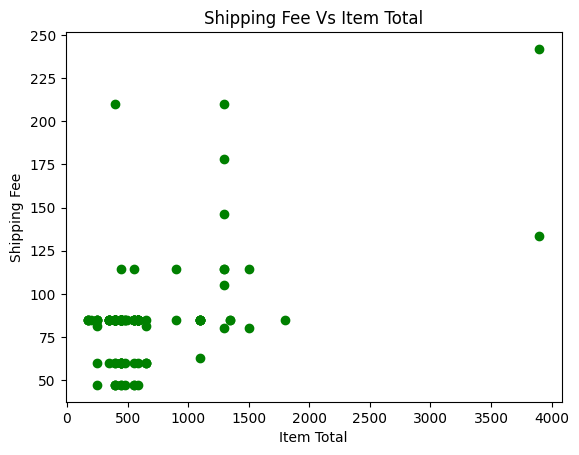

In [11]:
plt.scatter(df['item_total'], df['shipping_fee'], color='green')

plt.xlabel('Item Total')
plt.ylabel('Shipping Fee')
plt.title('Shipping Fee Vs Item Total')

There doesn't seem to be a strong correlation between shipping fee and item total. The bulk of the shipping fee cost between ₹40 - ₹80. This is probably because a large number of the orders on records cost around ₹500. We will get to see how strongly correlated these two are in the correlation matrix below.

Text(0.5, 1.0, 'Distribution of Shipping Fee')

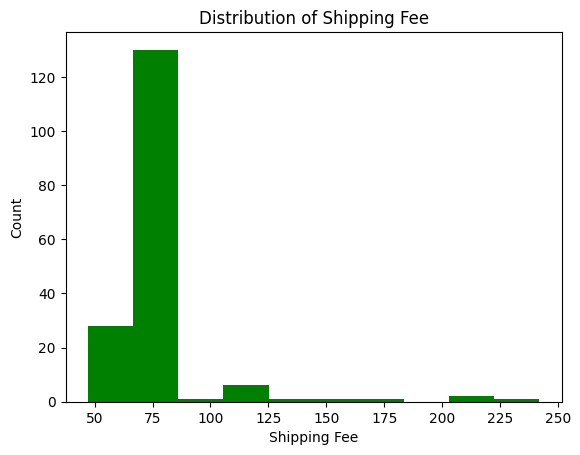

In [34]:
plt.hist(df['shipping_fee'], bins=10, color='green')
plt.xlabel('Shipping Fee')
plt.ylabel('Count')
plt.title('Distribution of Shipping Fee')

Text(0.5, 0, 'Mode of Payment')

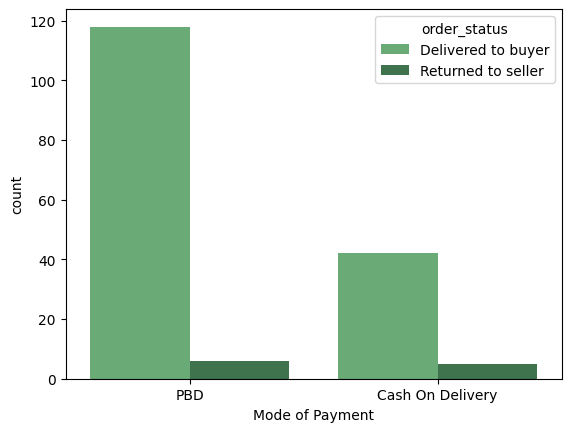

In [13]:
category_1 = df['cod']
category_2 = df['order_status']

sns.countplot(x=category_1, hue=category_2, data=df, palette='Greens_d')
plt.xlabel('Mode of Payment')

Here, the aim was to find out if people who paid delivery returned their products to the seller more and vice versa. From the chart, it can be seen that the data doesnt have enough information to make that assertion. Most people paid before delivery so I would be biased if I make a conclusion based on this. However, from this, mode of payment has little to no effect on  order status

<ipython-input-14-e34e697b37d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

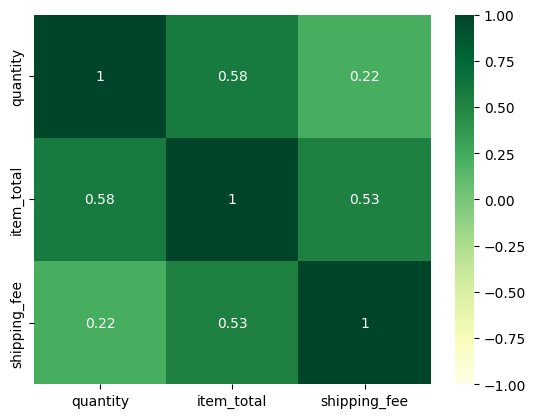

In [14]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', vmin=-1, vmax=1)

The correlation matrix gives the correlation coefficients between between the numerical columns. The strongest correlation in the dataset is between Shipping fee and item total. Therefore, as item total increases, shipping fee also increases.

([<matplotlib.patches.Wedge at 0x7ac470ff5d50>,
 [Text(-0.22078974853294556, -1.077613978631847, 'Delivered to buyer'),
  Text(0.2207897233095703, 1.0776139837998038, 'Returned to seller')],
 [Text(-0.1204307719270612, -0.5877894428900983, '93.6%'),
  Text(0.12043075816885651, 0.5877894457089837, '6.4%')])

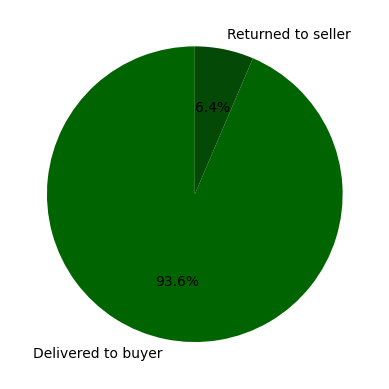

In [15]:
values = df['order_status'].value_counts()

plt.pie(values, autopct='%1.1f%%', startangle=90, labels=values.index, colors=['#006400', '#054907'])

This chart just shows what percentage of the orders were returned to the seller.

[Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '13'),
 Text(0, 0, '31'),
 Text(0, 0, '19'),
 Text(0, 0, '12'),
 Text(0, 0, '16'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '1'),
 Text(0, 0, '17'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

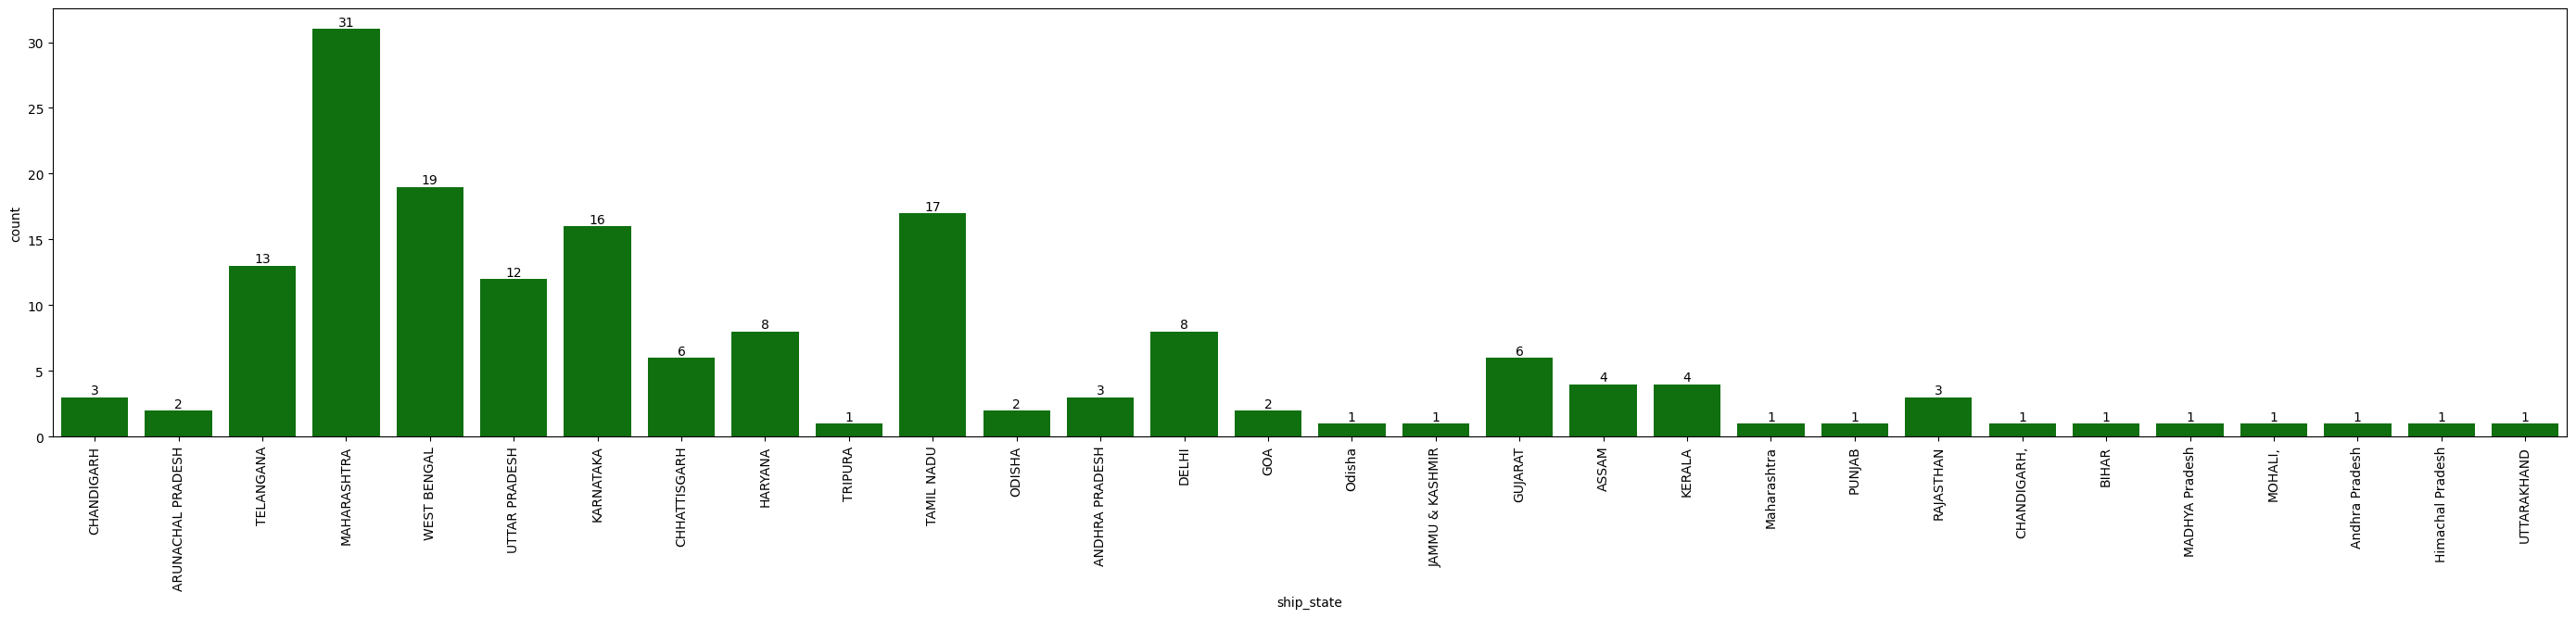

In [16]:
plt.figure(figsize=(35, 6))

sns.countplot(x=df['ship_state'], color='green')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0])

The final chart shows the states were the business has its orders.

# **Machine Learning**   

# **Data Preprocessing**

In [17]:
df.head(10)

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,449.000000,84.96,PBD,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.000000,60.18,PBD,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,449.000000,60.18,PBD,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,582.856209,84.96,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.000000,84.96,PBD,Delivered to buyer
5,406-9292208-6725123,"Thu, 17 Jun, 2021, 9:12 pm IST",Subinita,"HOWRAH,",WEST BENGAL,SKU: HH-FOWV-5YWO,Women's Trendy Pure Leather Clutch Purse | Lea...,1,200.000000,84.96,PBD,Delivered to buyer
6,404-5794317-7737924,"Thu, 12 Aug, 2021, 8:03 pm IST",shailendra,"ORAI,",UTTAR PRADESH,SKU: TQ-OE6K-9DIK,Ultra Slim 100% Pure Leather Men's Wallet with...,1,582.856209,84.96,Cash On Delivery,Returned to seller
7,405-8702211-4054722,"Wed, 29 Sept, 2021, 2:55 pm IST",Pratima,"BAREILLY,",UTTAR PRADESH,SKU: S1-A92Q-JU3X,100% Pure Leather Shantiniketan Clutch Purse: ...,1,399.000000,84.96,Cash On Delivery,Delivered to buyer
8,171-1434812-8061163,"Sat, 13 Nov, 2021, 7:37 pm IST",Ipshita,"BENGALURU,",KARNATAKA,SKU: 3F-4R9N-Z8NJ,Set of 2 Pure Leather Block Print Round Jewelr...,1,399.000000,84.96,PBD,Delivered to buyer
9,171-7954707-4463549,"Mon, 9 Aug, 2021, 4:47 pm IST",A.Jayaprada,"Bhilai,",CHHATTISGARH,SKU: NU-CKZ5-4O49,Pure Leather Sling Bag with Multiple Pockets a...,1,1099.000000,84.96,PBD,Delivered to buyer


In [18]:
#remove columns that are not useful

columns_to_drop = ['order_no', 'order_date', 'buyer', 'description']
df = df.drop(columns=columns_to_drop)

In [19]:
df.columns #checking new columns

Index(['ship_city', 'ship_state', 'sku', 'quantity', 'item_total',
       'shipping_fee', 'cod', 'order_status'],
      dtype='object')

In [20]:
#encode the categorical columns using One Hot Encoding

categorical_columns = ['ship_city', 'ship_state', 'sku', 'cod', 'order_status']
df_encode = pd.get_dummies(data = df, prefix= 'OHE', prefix_sep= '_', columns= categorical_columns, drop_first= True, dtype= 'int8')

In [21]:
df_encode

,quantity,item_total,shipping_fee,"OHE_AHMEDABAD,","OHE_ALLAHABAD,","OHE_AMROHA,","OHE_BADLAPUR,","OHE_BAREILLY,","OHE_BENGALURU,","OHE_BIDHAN NAGAR,",...,OHE_SKU: U1-8YOK-510E,OHE_SKU: UR-WJJ0-I3TN,OHE_SKU: V6-KQJX-XGP2,OHE_SKU: V6-VUWR-856W,OHE_SKU: W4-JQ2J-ZUF2,OHE_SKU: WR-ANCX-U28C,OHE_SKU: X2-PMD5-PL2D,OHE_SKU: YJ-5CCT-M3PP,OHE_PBD,OHE_Returned to seller
0,1,449.000000,84.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,449.000000,60.18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,449.000000,60.18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,582.856209,84.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1099.000000,84.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,3,1347.000000,84.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,1,1299.000000,114.46,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
168,1,1299.000000,105.02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
169,1,1499.000000,80.24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(171, 8)

## **Building the Model**

In [23]:
#import libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [24]:
df_encode.columns

Index(['quantity', 'item_total', 'shipping_fee', 'OHE_AHMEDABAD,',
       'OHE_ALLAHABAD,', 'OHE_AMROHA,', 'OHE_BADLAPUR,', 'OHE_BAREILLY,',
       'OHE_BENGALURU,', 'OHE_BIDHAN NAGAR,',
       ...
       'OHE_SKU:  U1-8YOK-510E', 'OHE_SKU:  UR-WJJ0-I3TN',
       'OHE_SKU:  V6-KQJX-XGP2', 'OHE_SKU:  V6-VUWR-856W',
       'OHE_SKU:  W4-JQ2J-ZUF2', 'OHE_SKU:  WR-ANCX-U28C',
       'OHE_SKU:  X2-PMD5-PL2D', 'OHE_SKU:  YJ-5CCT-M3PP', 'OHE_PBD',
       'OHE_Returned to seller'],
      dtype='object', length=167)

In [25]:
df_encode['OHE_Returned to seller'].unique()

array([0, 1], dtype=int8)

In [26]:
#defining target and features

x = df_encode.drop('OHE_Returned to seller', axis=1) #features
y = df_encode['OHE_Returned to seller'] #target

Model Selection Using Cross Validation

In [27]:
#create classifiers

svm_classifier = SVC(kernel='linear', C=1)
lr_classifier = LogisticRegression(max_iter=1000)
rf_classifier = RandomForestClassifier(random_state=42)

Based on the data, it was decided that these 3 classifiers will give the best solution.

In [28]:
#define cross validation method. In this case, the KFold Method

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
#compare classifiers using cross validation

svm_score = cross_val_score(svm_classifier, x, y, cv=kfold, scoring='accuracy')
lr_score = cross_val_score(lr_classifier, x, y, cv=kfold, scoring='accuracy')
rf_score = cross_val_score(rf_classifier, x, y, cv=kfold, scoring='accuracy')

In [30]:
#get average accuracy for each model

print("SVM Average Accuracy:", svm_score.mean())
print("LR Average Accuracy:", lr_score.mean())
print("RF Average Accuracy:", rf_score.mean())

SVM Average Accuracy: 0.9179831932773108
LR Average Accuracy: 0.9356302521008404
RF Average Accuracy: 0.9297478991596639


Since Logistic Regression has the highest accuracy score, it is chosen as the preferred model.

In [31]:
#split dataset into testing and training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [32]:
#create model

model = LogisticRegression(max_iter=1000)

#fit model to training data
model.fit(x_train, y_train)

#perform prediction on training data
y_pred = model.predict(x_test)

# **Model Evaluation**

In [33]:
#checking accuracy of model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


The model has an accuracy of 91%. The model is accepatable  

# **Recommendation**

While the model has a high accuracy, it is important to note that the dataset is really small so it may not present a full picture of the businees.

It is advised that the ML model be trained on a larger sample of the data in the future. This is to prevent overfitting/underfiiting.